In [43]:
#Import copernicusmarine

#x = copernicusmarine.subset(
#  dataset_id="cmems_mod_glo_phy_my_0.083deg_P1M-m",
#  variables=["siconc", "sithick", "so", "thetao"],
#  minimum_longitude=-180,
#  maximum_longitude=180,
#  minimum_latitude=-90,
#  maximum_latitude=-50,
#  start_datetime="2020-08-01T00:00:00",
#  end_datetime="2020-08-31T00:00:00",
#  minimum_depth=0.49402499198913574,
#  maximum_depth=0.49402499198913574,
#)

In [42]:
# Listar as variáveis disponíveis
#print(x)

In [3]:
print(type(x))  # Verifica o tipo do objeto
print(dir(x))   # Lista métodos e atributos disponíveis

In [4]:
#print (x.variables)
#print (type(x.variables))

In [1]:
from netCDF4 import Dataset

In [2]:
# Abrir o arquivo NetCDF
dados = Dataset("cmems_mod_glo_phy_my_0.083deg_P1M-m_multi-vars_180.00W-179.92E_80.00S-50.00S_0.49m_2020-08-01.nc", "r")

In [3]:
# Listar as variáveis disponíveis
print(dados.variables.keys())

# Acessar uma variável
var = dados.variables["siconc"]

# Verificar o tipo
print(type(var))

dict_keys(['depth', 'latitude', 'longitude', 'time', 'siconc', 'sithick', 'so', 'thetao'])
<class 'netCDF4._netCDF4.Variable'>


In [4]:
import numpy as np

# Armazenar as coordenadas
profundidade = np.array(dados.variables["depth"][:])  # Profundidade
lat = np.array(dados.variables["latitude"][:])  # Latitude
lon = np.array(dados.variables["longitude"][:])  # Longitude
sic = np.array(dados.variables["siconc"][0,:]) # Concentração de gelo marinho
temp = np.array(dados.variables["thetao"][0, 0, :, :])  # Tempo=0, Profundidade=0 (superfície)
sal = np.array(dados.variables["so"][0, 0, :, :])
gelo = np.array(dados.variables["sithick"][0,:])

In [5]:
print (temp.shape)
print (lat.shape)
print (lon.shape)
print (sic.shape)
print (sal.shape)
print (gelo.shape)

(361, 4320)
(361,)
(4320,)
(361, 4320)
(361, 4320)
(361, 4320)


In [6]:
print(dados.dimensions)  # Exibe as dimensões do arquivo

{'depth': "<class 'netCDF4.Dimension'>": name = 'depth', size = 1, 'latitude': "<class 'netCDF4.Dimension'>": name = 'latitude', size = 361, 'longitude': "<class 'netCDF4.Dimension'>": name = 'longitude', size = 4320, 'time': "<class 'netCDF4.Dimension'>": name = 'time', size = 1}


# TEMPERATURA

In [7]:
print("Temperatura mínima:", np.nanmin(temp))
print("Temperatura máxima:", np.nanmax(temp))

#existem valores irreais mínimos. 
#O valor mínimo de -32767.0 é um claro indicativo de missing values ou erro no dataset. Esse é um valor comum usado para representar dados ausentes em arquivos NetCDF.

Temperatura mínima: -32767.0
Temperatura máxima: 10.358317829668522


In [8]:
temp[temp <= -32767] = np.nan #corrigindo e atribuindo nan

In [9]:
print("Temperatura mínima:", np.nanmin(temp))
print("Temperatura máxima:", np.nanmax(temp))

#agora corrigimos esses valores irreais

Temperatura mínima: -2.3093050718307495
Temperatura máxima: 10.358317829668522


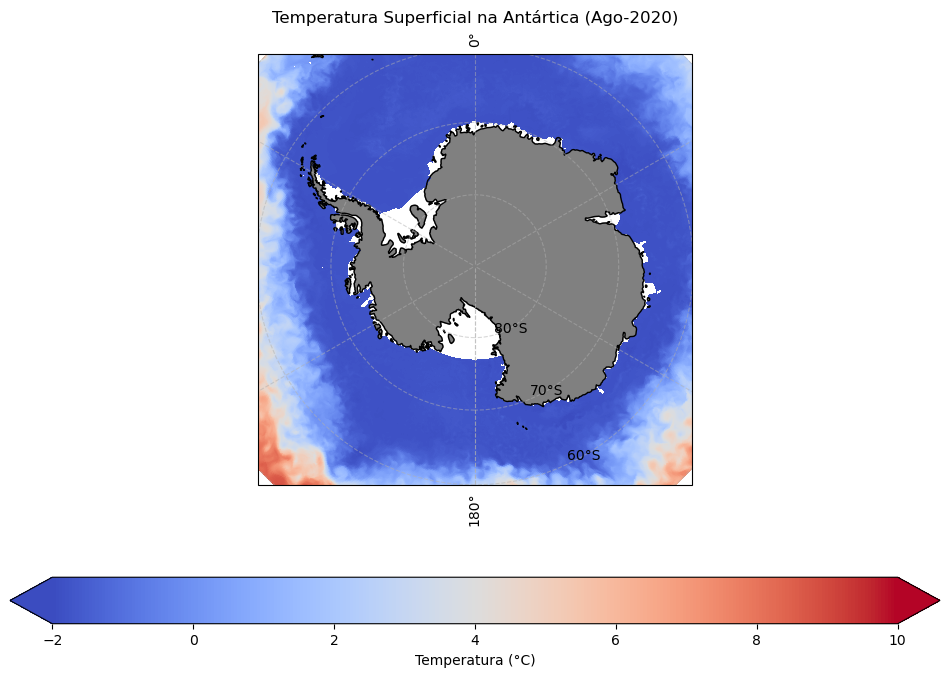

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Criar a grade de coordenadas
lon2d, lat2d = np.meshgrid(lon, lat)

# Criar a figura e a projeção polar para a Antártica
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Adicionar a terra e a linha de costa
ax.add_feature(cfeature.LAND, color="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

# Definir limites da região da Antártica
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())  # Limitar a visualização para a Antártica

norm = mcolors.Normalize(vmin=-2, vmax=10)

# Plotar a temperatura usando pcolormesh
temp_plot = ax.pcolormesh(lon2d, lat2d, temp, shading='auto', cmap="coolwarm", norm=norm, transform=ccrs.PlateCarree())

# Adicionar a barra de cores
plt.colorbar(temp_plot, ax=ax, orientation="horizontal", label="Temperatura (°C)", extend="both")

# Adicionar título e rótulos
ax.set_title("Temperatura Superficial na Antártica (Ago-2020)")

plt.savefig("temperatura_antartica_ago.png", dpi=300, bbox_inches="tight")

# Exibir o mapa
plt.show()

# SALINIDADE

In [11]:
print("Salinidade mínima:", np.nanmin(sal))
print("Salinidade máxima:", np.nanmax(sal))

Salinidade mínima: -32767.0
Salinidade máxima: 38.9278847258538


In [12]:
sal[sal <= -32767] = np.nan #corrigindo e atribuindo nan

In [13]:
print("Salinidade mínima:", np.nanmin(sal))
print("Salinidade máxima:", np.nanmax(sal))

Salinidade mínima: 25.865962682291865
Salinidade máxima: 38.9278847258538


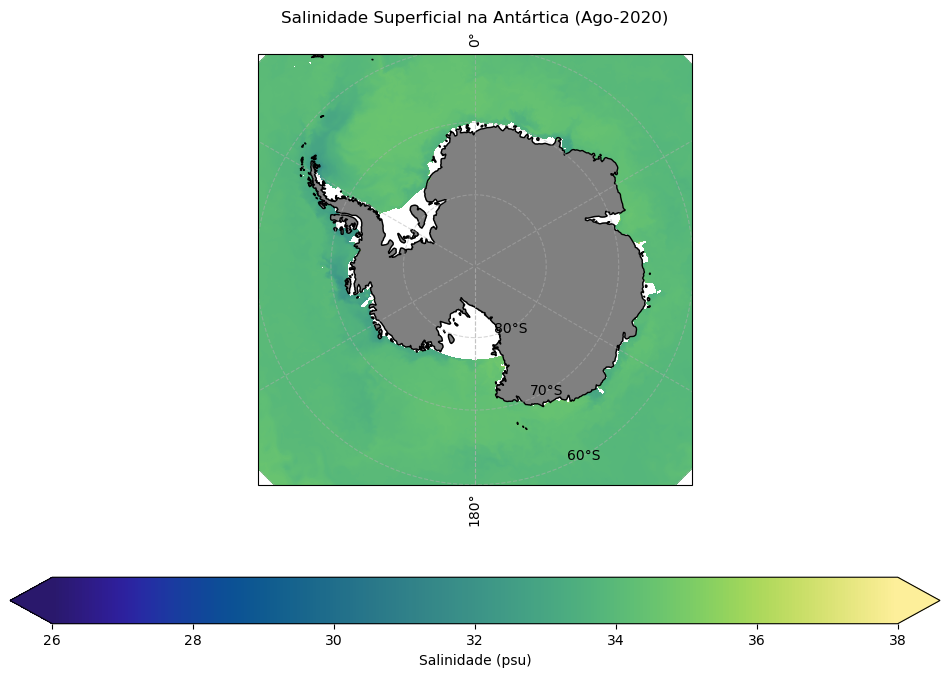

In [28]:
import cmocean

# Criar a grade de coordenadas
lon2d, lat2d = np.meshgrid(lon, lat)

# Criar a figura e a projeção polar para a Antártica
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Adicionar a terra e a linha de costa
ax.add_feature(cfeature.LAND, color="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

# Definir limites da região da Antártica
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Normalizar a escala de cores
norm = mcolors.Normalize(vmin=26, vmax=38)

# Plotar a salinidade
sal_plot = ax.pcolormesh(lon2d, lat2d, sal, shading='auto', cmap=cmocean.cm.haline,
                     	norm=norm, transform=ccrs.PlateCarree())

# Adicionar a barra de cores com melhor escala
plt.colorbar(sal_plot, ax=ax, orientation="horizontal", label="Salinidade (psu)", extend="both")

plt.title("Salinidade Superficial na Antártica (Ago-2020)")

plt.savefig("salinidade_antartica_ago.png", dpi=300, bbox_inches="tight")

plt.show()

# SIC

In [16]:
print("SIC:", np.nanmin(sic))
print("SIC:", np.nanmax(sic))

SIC: -32767.0
SIC: 0.9979171107988805


In [17]:
sic[sic <= -32767] = np.nan #corrigindo e atribuindo nan

In [18]:
print("SIC mínima:", np.nanmin(sic))
print("SIC máxima:", np.nanmax(sic))

SIC mínima: 0.0
SIC máxima: 0.9979171107988805


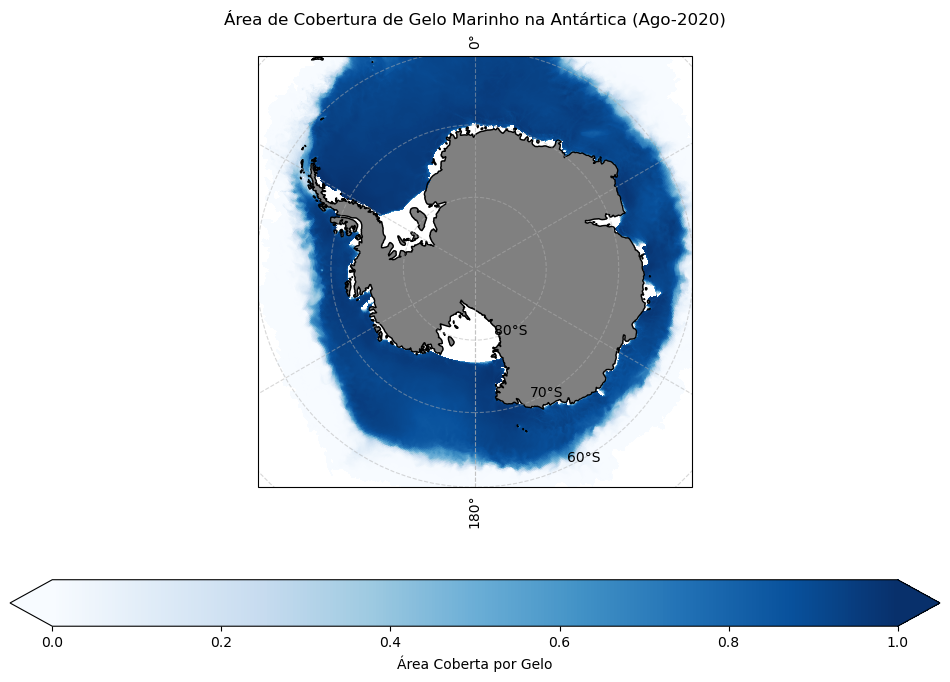

In [29]:
# Criar a grade de coordenadas
lon2d, lat2d = np.meshgrid(lon, lat)

# Criar a figura e a projeção polar para a Antártica
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Adicionar a terra e a linha de costa
ax.add_feature(cfeature.LAND, color="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

# Definir limites da região da Antártica
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Normalizar a escala de cores
norm = mcolors.Normalize(vmin=0, vmax=1)

# Plotar
import cmocean
sic_plot = ax.pcolormesh(lon2d, lat2d, sic, shading='auto', cmap="Blues",
                     	norm=norm, transform=ccrs.PlateCarree())

# Adicionar a barra de cores com melhor escala
plt.colorbar(sic_plot, ax=ax, orientation="horizontal", label="Área Coberta por Gelo", extend="both")

plt.title("Área de Cobertura de Gelo Marinho na Antártica (Ago-2020)")

plt.savefig("sic_antartica_ago.png", dpi=300, bbox_inches="tight")

plt.show()

# ESPESSURA DE GELO

In [21]:
print("Espessura do Gelo:", np.nanmin(gelo))
print("Espessura de Gelo:", np.nanmax(gelo))

Espessura do Gelo: -32767.0
Espessura de Gelo: 4.317606124095619


In [23]:
gelo[gelo <= -32767] = np.nan #corrigindo e atribuindo nan

In [24]:
print("Espessura do Gelo:", np.nanmin(gelo))
print("Espessura de Gelo:", np.nanmax(gelo))

Espessura do Gelo: 0.0
Espessura de Gelo: 4.317606124095619


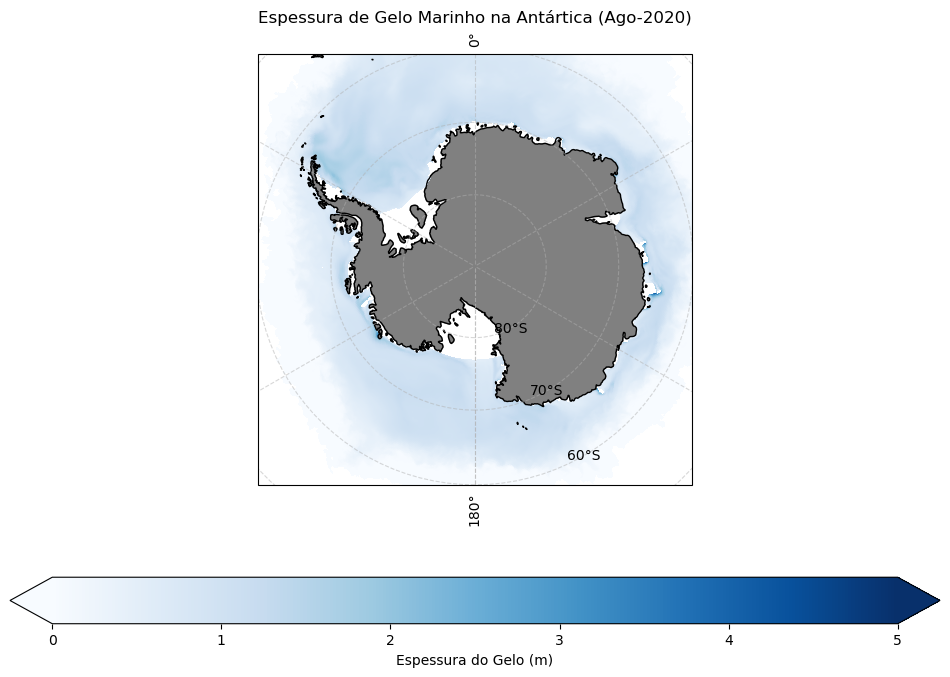

In [30]:
import numpy as np #importando numpy de novo porque teria que executar tudo

# Criar a grade de coordenadas
lon2d, lat2d = np.meshgrid(lon, lat)

# Criar a figura e a projeção polar para a Antártica
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Adicionar a terra e a linha de costa
ax.add_feature(cfeature.LAND, color="gray")
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

# Definir limites da região da Antártica
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Normalizar a escala de cores
norm = mcolors.Normalize(vmin=0, vmax=5)

# Plotar
import cmocean
gelo_plot = ax.pcolormesh(lon2d, lat2d, gelo, shading='auto', cmap="Blues",
                     	norm=norm, transform=ccrs.PlateCarree())

# Adicionar a barra de cores com melhor escala
plt.colorbar(gelo_plot, ax=ax, orientation="horizontal", label="Espessura do Gelo (m)", extend="both")

plt.title("Espessura de Gelo Marinho na Antártica (Ago-2020)")

plt.savefig("gelo_antartica_ago.png", dpi=300, bbox_inches="tight")

plt.show()

In [31]:
from PIL import Image

# Abrir as imagens
img1 = Image.open("temperatura_antartica_ago.png")
img2 = Image.open("salinidade_antartica_ago.png")
img3 = Image.open("sic_antartica_ago.png")
img4 = Image.open("gelo_antartica_ago.png")

# Assumindo que todas têm o mesmo tamanho
w, h = img1.size

# Criar imagem final (2 mapas por linha = 2x2)
final_img = Image.new("RGB", (2 * w, 2 * h))

# Colar as imagens no painel
final_img.paste(img1, (0, 0))
final_img.paste(img2, (w, 0))
final_img.paste(img3, (0, h))
final_img.paste(img4, (w, h))

# Salvar ou exibir
final_img.save("painel_mapas_ago.png")
final_img.show()